gen	nevals
0  	100   
1  	91    
2  	90    
3  	91    
4  	91    
5  	90    
6  	87    
7  	93    
8  	96    
9  	91    
10 	89    
11 	85    
12 	88    
13 	91    
14 	89    
15 	94    
16 	90    
17 	91    
18 	93    
19 	88    
20 	96    
21 	93    
22 	89    
23 	93    
24 	91    
25 	91    
26 	90    
27 	88    
28 	92    
29 	88    
30 	91    
31 	90    
32 	82    
33 	85    
34 	96    
35 	96    
36 	90    
37 	92    
38 	89    
39 	92    
40 	93    
41 	95    
42 	91    
43 	89    
44 	88    
45 	90    
46 	92    
47 	84    
48 	94    
49 	90    
50 	92    
Pareto-Optimal Solutions:
(-485.1, 2.0)
(-4529.25, -815.0)
(-4618.35, -833.0)
(-1687.95, -241.0)
(-2618.55, -429.0)
(-1801.8, -264.0)
(-2019.6, -308.0)
(-742.5, -50.0)
(-4450.05, -799.0)
(-2118.6, -328.0)
(-598.95, -21.0)
(-905.85, -83.0)
(-2281.95, -361.0)
(-4202.55, -749.0)
(-3341.25, -575.0)
(-2702.7, -446.0)
(-4415.4, -792.0)
(-3648.15, -637.0)
(-2564.1, -418.0)
(-851.4, -72.0)
(-1564.2, -216.0)
(-4360.95, -781.0)
(-3593

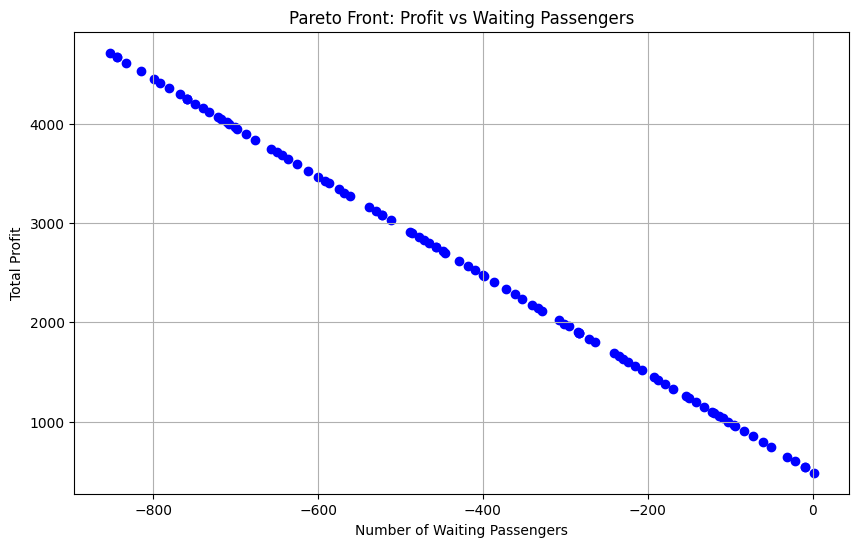

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Problem parameters
NUM_VEHICLES = 10  # K
NUM_NODES = 100   # N
NUM_TIMESTEPS = 1440  # T
BATTERY_CAPACITY = 100  # [kWh]
MAX_WAITING = 100  # Arbitrary high penalty for waiting passengers

# Pricing and energy parameters
PI_TRIP = 5.0        # Price paid per passenger [CA$/passenger]
PI_CH = 0.2          # Price to buy energy [CA$/kWh]
PI_OUT = 0.4         # Price to sell energy [CA$/kWh]
ENERGY_CONSUMPTION = 2.0  # Energy consumed per trip [kWh]
BATTERY_DEGRADATION_COST = 0.05  # Battery degradation cost per kWh [CA$/kWh]

# Objective functions: f1 (Profit) and f2 (Waiting passengers)
def evaluate(individual):
    """
    Fitness function based on the objectives:
    1. Maximise profit (trip revenue - energy costs)
    2. Minimise total waiting passengers
    """
    trips_served = sum(individual)  # Placeholder: total trips served (binary encoded)
    energy_charged = trips_served * ENERGY_CONSUMPTION  # Total energy charged
    energy_discharged = trips_served * (ENERGY_CONSUMPTION / 2)  # Placeholder for outage supply
    waiting_passengers = MAX_WAITING - trips_served  # Simulated waiting passengers

    # Objective 1: Profit calculation
    f_t_trip = PI_TRIP * trips_served  # Trip revenue
    f_t_eng = (PI_CH * energy_charged - PI_OUT * energy_discharged 
               + BATTERY_DEGRADATION_COST * energy_discharged)  # Energy and degradation costs
    profit = f_t_trip - f_t_eng  # Net profit

    # Objective 2: Waiting passengers (minimised)
    return -profit, waiting_passengers  # Negative profit for maximisation

# Constraints Handling: Ensures SOC, routing, and energy balance feasibility
def constraint_check(individual):
    """
    Add penalties for infeasible solutions
    Placeholder for constraints like battery SOC, routing feasibility, etc.
    """
    penalty = 0
    # Example penalty logic could be added here
    return penalty

# Genetic Algorithm setup
creator.create("FitnessMulti", base.Fitness, weights=(1.0, -1.0))  # Maximise profit, minimise waiting
creator.create("Individual", list, fitness=creator.FitnessMulti)

# Toolbox setup
toolbox = base.Toolbox()
# Representation: Randomly initialise vehicle routes, charging decisions
toolbox.register("attribute", random.randint, 0, NUM_NODES)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, n=NUM_VEHICLES)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=NUM_NODES, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

def main():
    pop_size = 100
    ngen = 50
    cxpb = 0.7  # Crossover probability
    mutpb = 0.2  # Mutation probability

    # Initialise population
    pop = toolbox.population(n=pop_size)
    
    # Run the NSGA-II algorithm
    algorithms.eaMuPlusLambda(pop, toolbox, mu=pop_size, lambda_=pop_size, 
                              cxpb=cxpb, mutpb=mutpb, ngen=ngen, 
                              stats=None, halloffame=None, verbose=True)

    # Extract Pareto front
    pareto_front = tools.sortNondominated(pop, len(pop), first_front_only=True)[0]
    print("Pareto-Optimal Solutions:")
    for ind in pareto_front:
        print(ind.fitness.values)
    
    # Visualization of the Pareto front
    profits = [-ind.fitness.values[0] for ind in pareto_front]  # Convert to positive profit
    waiting_times = [ind.fitness.values[1] for ind in pareto_front]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(waiting_times, profits, c='blue', marker='o')
    plt.title("Pareto Front: Profit vs Waiting Passengers")
    plt.xlabel("Number of Waiting Passengers")
    plt.ylabel("Total Profit")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
